In [ ]:
!pip install -q matplotlib opencv-python numpy scikit-learn


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
# === Load image ===
image_path = "/content/capital handwriting.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# === Preprocess image ===
def preprocess(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh

In [ ]:
thresh = preprocess(image)


In [ ]:
# === Segment characters ===
def segment_characters(thresh_img):
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segments = []
    boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w*h > 100:  # filter noise
            char_img = thresh_img[y:y+h, x:x+w]
            segments.append(char_img)
            boxes.append((x, y, w, h))
    sorted_pairs = sorted(zip(segments, boxes), key=lambda b: b[1][0])
    return [s for s, _ in sorted_pairs], [b for _, b in sorted_pairs]

char_images, bounding_boxes = segment_characters(thresh)

In [ ]:
# === Pad and center characters ===
def center_and_pad(img, size=64):
    h, w = img.shape
    scale = size * 0.8 / max(h, w)
    img = cv2.resize(img, (int(w * scale), int(h * scale)))
    h, w = img.shape
    padded = np.ones((size, size), dtype=np.uint8) * 255
    padded[(size-h)//2:(size-h)//2+h, (size-w)//2:(size-w)//2+w] = 255 - img
    return padded

In [ ]:
processed_chars = [center_and_pad(img) for img in char_images]

In [ ]:
# === Dummy classifier (replace with actual model prediction) ===
true_labels = ['normal'] * len(processed_chars)  # Replace with actual labels if available
import random
classes = ['normal', 'corrected', 'reversed']
predicted_labels = [random.choice(classes) for _ in processed_chars]

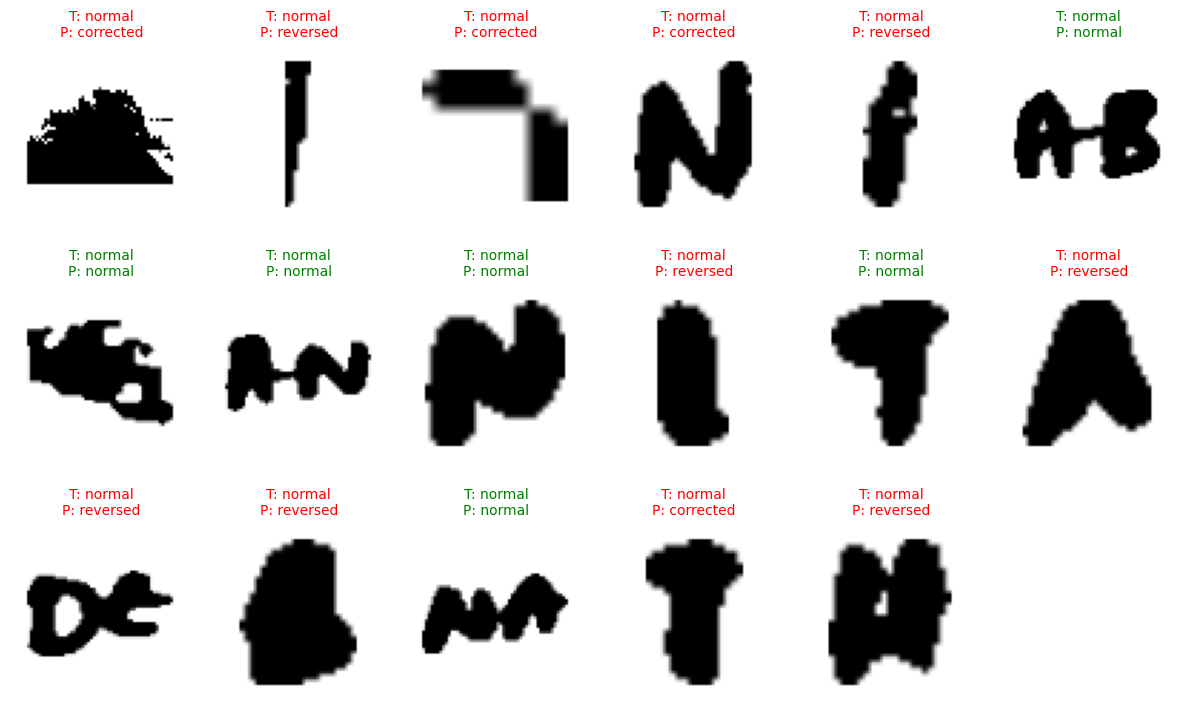

In [ ]:
# === Visualization ===
def visualize_predictions(images, true_labels, pred_labels, rows=3):
    cols = int(np.ceil(len(images) / rows))
    plt.figure(figsize=(2*cols, 2.5*rows))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        true = true_labels[i]
        pred = pred_labels[i]
        color = 'green' if true == pred else 'red'
        plt.title(f"T: {true}\nP: {pred}", color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(processed_chars, true_labels, predicted_labels)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
# Load the image
img_path = "/content/final handwriting.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [ ]:
# Segment characters using contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
char_boxes = sorted([cv2.boundingRect(c) for c in contours], key=lambda b: b[0])  # sort left to right


In [ ]:
def center_pad(image, size=64):
    """Pads the image to a square of `size` while centering the content."""
    h, w = image.shape
    scale = size * 0.8 / max(h, w)  # scale to fit 80% of the box
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    pad_w, pad_h = (size - new_w) // 2, (size - new_h) // 2
    padded = np.full((size, size), 255, dtype=np.uint8)
    padded[pad_h:pad_h+new_h, pad_w:pad_w+new_w] = resized
    return padded

In [ ]:
char_images = []
for (x, y, w, h) in char_boxes:
    char_crop = thresh[y:y+h, x:x+w]
    padded = center_pad(char_crop)
    char_images.append(padded)

In [ ]:
# Dummy classifier (replace this with your actual model)
def dummy_classifier(img):
    return np.random.choice(['normal', 'corrected', 'reversed'])


In [ ]:
true_labels = ['normal'] * len(char_images)  # Replace with your real labels


In [ ]:
# Predict and collect results
results = []
for i, char_img in enumerate(char_images):
    pred = dummy_classifier(char_img)
    true = true_labels[i]
    results.append((char_img, true, pred))


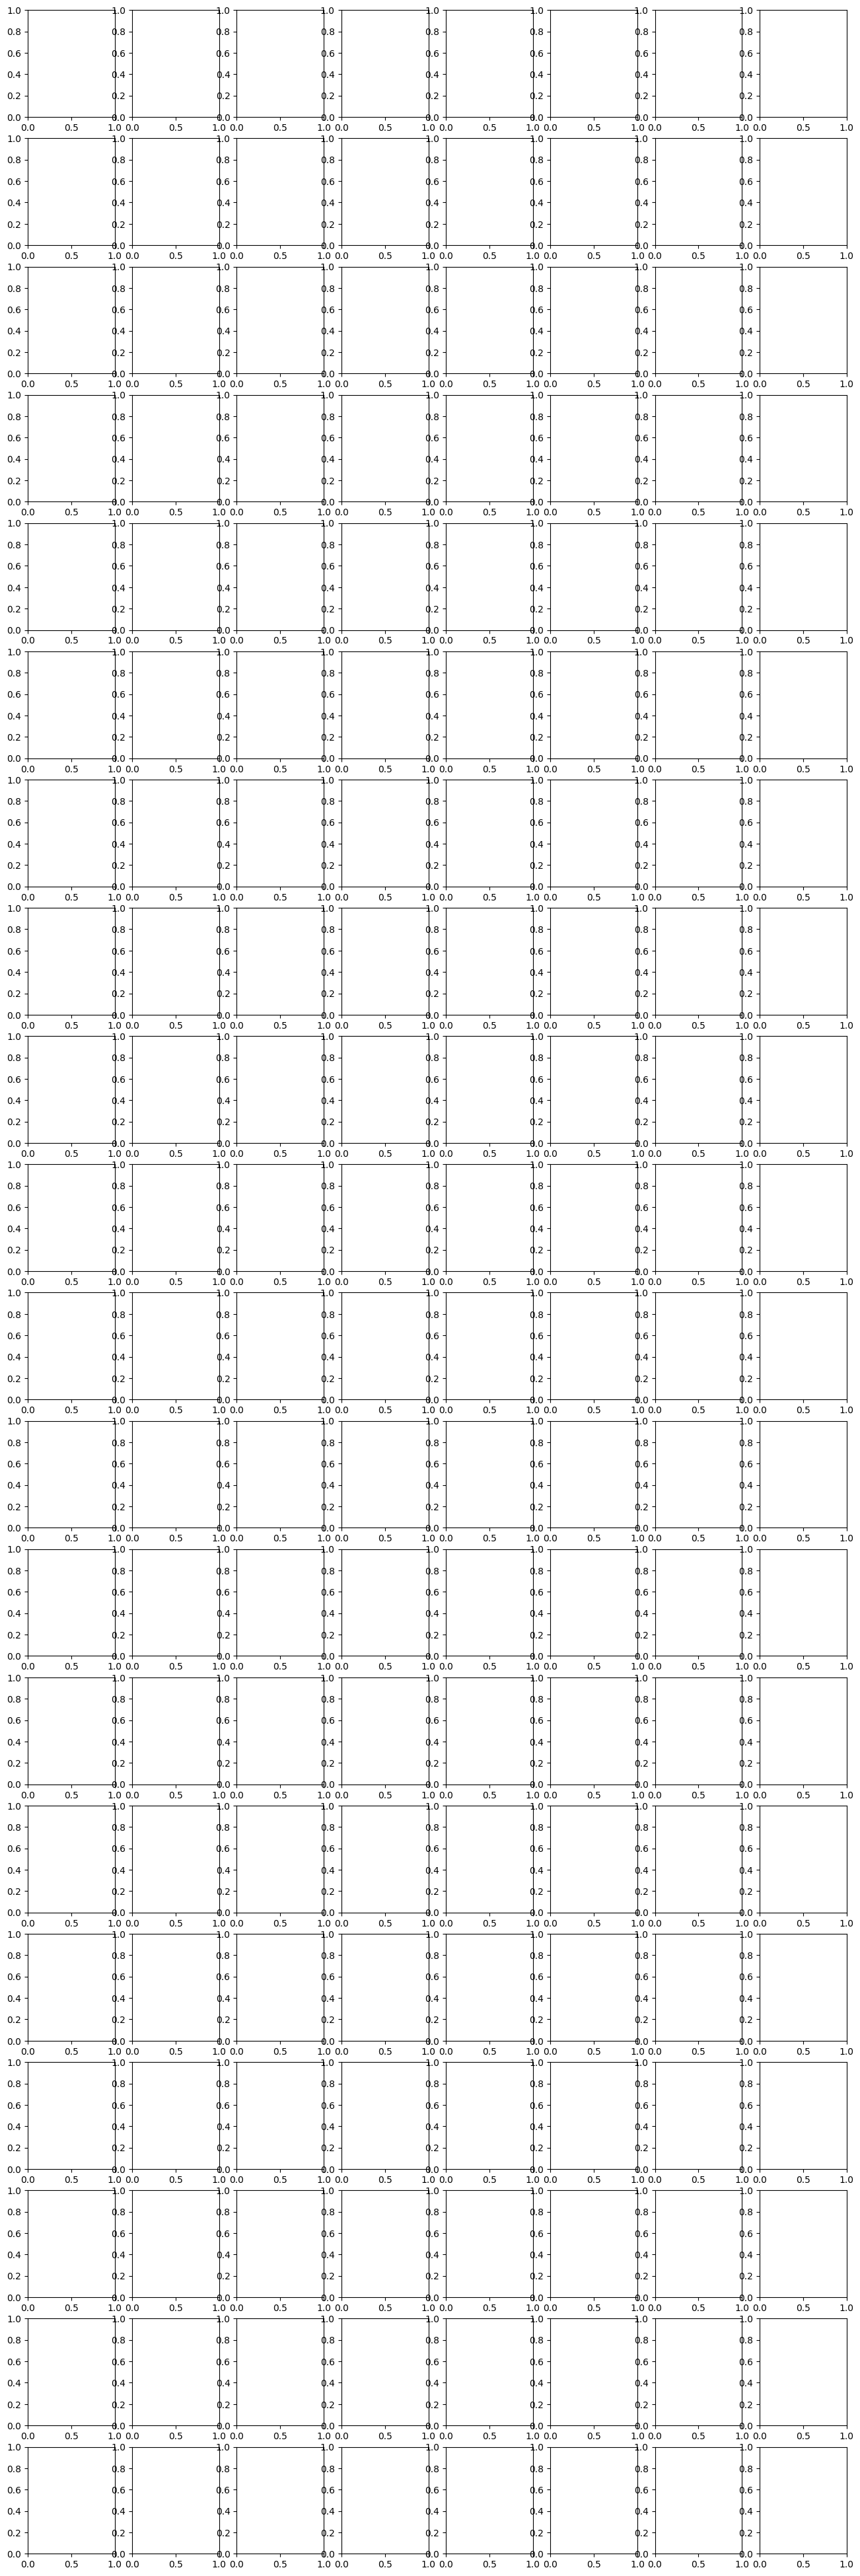

In [ ]:
# Plotting
cols = 8
rows = int(np.ceil(len(results) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 2.5 * rows))

In [ ]:
for i, ax in enumerate(axes.flat):
    if i < len(results):
        img, true, pred = results[i]
        ax.imshow(img, cmap='gray')
        color = 'green' if true == pred else 'red'
        ax.set_title(f'True: {true}\nPred: {pred}', color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

NameError: name 'char_pixels' is not defined